# Guidance for the regression on the MNIST data

This file provide a step-to-step guidance to apply MGDL model to  data (section 3.3 in the papar).

## Data descriptions
We create a seperate file 'MNISTLabelNoiseData.py' to generate data.  Readers can dive in this file to see how the data are generated.


## Training and testing models 
We create the seperate 'main_run.py' for training models. In this file, there are several parameters need to be setted.

+ amp: choose from 0.5, 1, 3. This is the parameter beta in \tau_{beta, kappa}. In this example, we explore three cases: bete = 0.5, 1, 3.

+ FREQ: choose from 1, 5, 10, 50. This is the parameter kappa in  \tau_{beta, kappa}. In this example, we explore four cases: beta = 1, 5, 10, 50.

+ SGD :  choose from 'True' or 'False'. If employing the stochastic method within Adam, set SGD to 'True' and define the minibatch size. Conversely, if utilizing the full gradient in Adam, set SGD to 'False' and minibatch size to 'False'.

+ mini_batch : choose from '256', '512', 'Full'. Set the minibatch size.

+ mul_layers_dims: [[784, 128, 128, 10], [128, 128, 128, 10], [128, 128, 128, 10]]. This is the structure of MGDL model.

+ mul_epochs: [2000, 2000, 2000]. The total of training epochs in MGDL.  

+ MIN_learning_rate: choose from '1e-5, 1e-4'. The minimum learning rate, denote as $t_{min}$ in the paper. 

+ MAX_learning_rate: choose from '1e-4, 1e-3'. The maximum learning rate, denote as $t_{max}$ in the paper. (there is a typo in the paper. the maximum chosen from 1e-4, 1e-3).

Once the above parameters setted, we can train our model by run the file 'main_run.py'.

##### Training MGDL model by readers
If readers prefer to train the model themselves, they can utilize the following code and the results will be save in the folder 'results'

In [20]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%run main_run.py

Reader can analysis and test their own model as follows.

MGDL train rse for each grade is [0.6768180106752474, 0.6475593859626922, 0.6433249569826172]
MGDL validation rse for each grade is [0.6790587128724008, 0.6499176736619131, 0.6456521567732006]


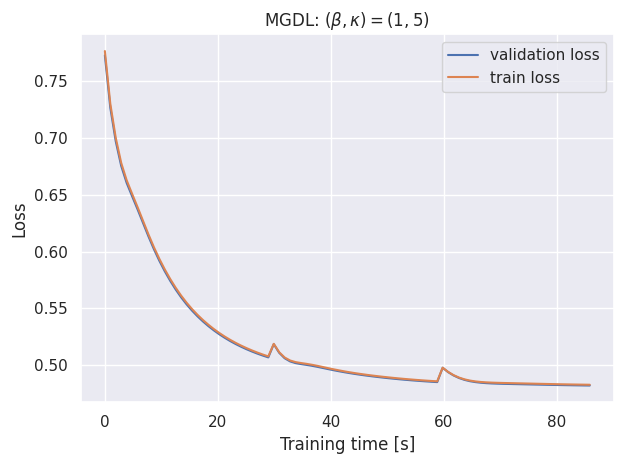

In [12]:
import glob
from analysis import results_analysis_bestvalloss
path = 'results/*.pickle'
for file in glob.glob(path):
    results_analysis_bestvalloss(file)  #if figure is True, the loss and training process will display, otherwise only display loss
 

In [13]:
import glob
from analysis import test_model
Amptype = "decrease"
path = 'results/*.pickle'.format(Amptype)
for file in glob.glob(path):
    print(file)
    test_model(file)  #if figure is True, the loss and training process will display, otherwise only display loss
    

results/MGDL_batchzieFalse_epochs[30, 30, 30]_MAXLrate1.00e-03_MINLrate1.00e-04_vLoss4.8200e-01_cleanvloss2.3229e-01_tLoss4.8268e-01_amp1.0e+00_freq5.0e+00.pickle
MGDL test rse one testing data is [0.5065970305261289, 0.4643092787980165, 0.45828856517716565]


### Using our trained model

We encourage readers to train the model themselves to better understand/test MGDL. However, it reqiures several hours to train a good model. Therefore, it is utilizing our pre-trained model is also a good option, using the following code. We also create a seperate 'analysis.py' to analysis and test our trained model.

MGDL train rse for each grade is [0.3903329975147235, 0.3539874198939406, 0.34880746811244]
MGDL validation rse for each grade is [0.4188806798789146, 0.39155528541529083, 0.39088869249934827]


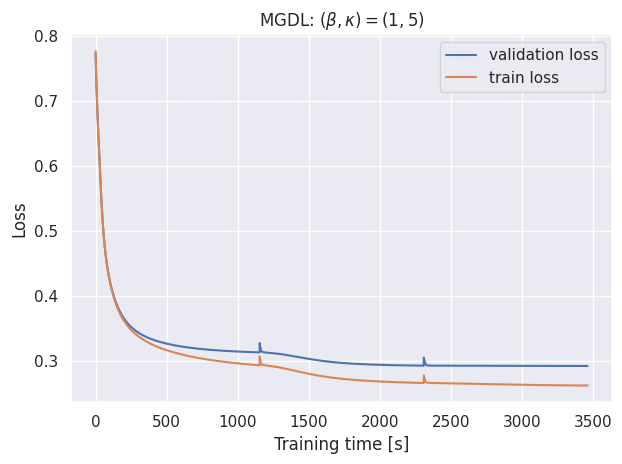

In [15]:
import glob
from analysis import results_analysis_bestvalloss
path = 'TrainedModel/*.pickle'
for file in glob.glob(path):
    results_analysis_bestvalloss(file) 

# Test model
After training the model, we employ the test data to evaluate its performance. It's important to emphasize that this test data is never involved in the training process.

In [18]:
import glob
from analysis import test_model
path = 'TrainedModel/*.pickle'.format(Amptype)
for file in glob.glob(path):
    print(file)
    test_model(file)  #if figure is True, the loss and training process will display, otherwise only display loss

TrainedModel/MGDL_batchzieFalse_epochs[2000, 2000, 2000]_MAXLrate1.00e-04_MINLrate1.00e-05_vLoss2.9181e-01_cleanvloss4.0246e-02_tLoss2.6171e-01_amp1.0e+00_freq5.0e+00.pickle
MGDL test rse one testing data is [0.12085403985724186, 0.07978235630341432, 0.07848923701379683]
